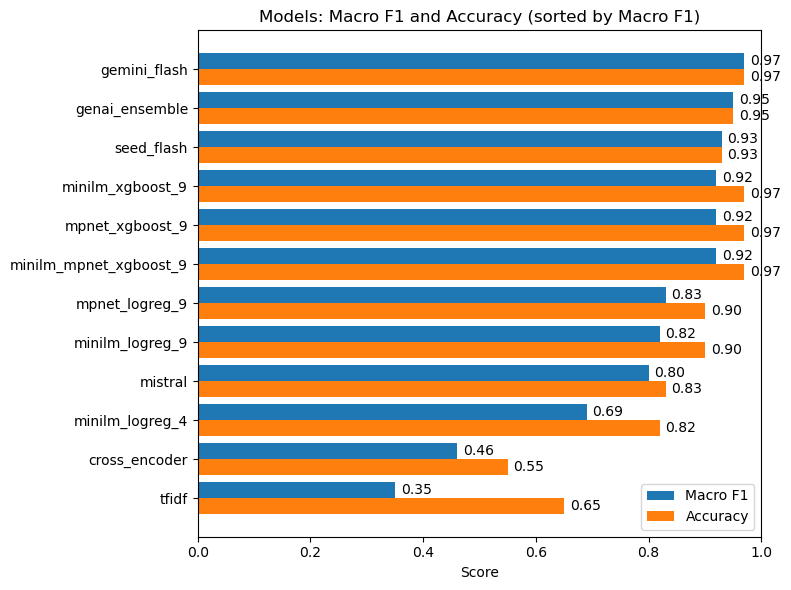

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# scores
tfidf = [0.35, 0.65]
minilm_logreg_4 = [0.69, 0.82]
cross_encoder = [0.46, 0.55]
minilm_logreg_9 = [0.82, 0.90]
minilm_xgboost_9 = [0.92, 0.97]
mpnet_logreg_9 = [0.83, 0.90]
mpnet_xgboost_9 = [0.92, 0.97]
minilm_mpnet_xgboost_9 = [0.92, 0.97]
gemini_flash = [0.97, 0.97]
seed_flash = [0.93, 0.93]
mistral = [0.80, 0.83]
genai_ensemble = [0.95, 0.95]

# build dataframe and sort by macro F1 (first element) descending
models = {
    'tfidf': tfidf,
    'minilm_logreg_4': minilm_logreg_4,
    'cross_encoder': cross_encoder,
    'minilm_logreg_9': minilm_logreg_9,
    'minilm_xgboost_9': minilm_xgboost_9,
    'mpnet_logreg_9': mpnet_logreg_9,
    'mpnet_xgboost_9': mpnet_xgboost_9,
    'minilm_mpnet_xgboost_9': minilm_mpnet_xgboost_9,
    'gemini_flash': gemini_flash,
    'seed_flash': seed_flash,
    'mistral': mistral,
    'genai_ensemble': genai_ensemble,
}

df = pd.DataFrame(models, index=['macro_f1', 'accuracy']).T
df = df.sort_values('macro_f1', ascending=False)

# plot horizontal grouped bars
y = np.arange(len(df))
h = 0.4

plt.figure(figsize=(8, 6))
plt.barh(y - h/2, df['macro_f1'], height=h, label='Macro F1', color='C0')
plt.barh(y + h/2, df['accuracy'], height=h, label='Accuracy', color='C1')

plt.yticks(y, df.index)
plt.gca().invert_yaxis()  # largest first at top
plt.xlim(0, 1)
plt.xlabel('Score')
plt.title('Models: Macro F1 and Accuracy (sorted by Macro F1)')
plt.legend()

# annotate values
for xi, yi in zip(df['macro_f1'], y - h/2):
    plt.text(xi + 0.01, yi, f'{xi:.2f}', va='center')
for xi, yi in zip(df['accuracy'], y + h/2):
    plt.text(xi + 0.01, yi, f'{xi:.2f}', va='center')

plt.tight_layout()
plt.show()